<div style="border:solid green 2px; padding: 20px">
    
<b>Иван, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Например, вот так.</div>
    
    
---

# Анализ оттока клиентов "Метанпромбанк"

**Заказчик**  -  отдел маркетинга "Метанпромбанка"

**Цель работы** - в банке повысился отток и с этим нужно что-то делать

**Конечный результат** - выделены отточные сегменты, даны рекомендации по его снижению

# Данные

**Userid** - идентификатор пользователя

**Score** - баллы кредитного скоринга

**City** - город

**Gender** - пол

**Age** - возраст

**Balance** - баланс на счете

**Products** - колличество продуктов, которыми пользуется клиент

**СreditCart** - имеется ли кредитная карта

**Last_activity** - активный ли клиент

**Estimated_salary** - заработная плата клиента

**Churn** - ушел или нет

**Equilty** - кол-во баллов собственности

# План работы

**1) Загрузка и описание данных.**

**2) Подготовка данных:**

**2.1) Анализ природы пропусков и их разумная обработка.**

**2.2) Кодирование для использования в анализе корреляций.**

**3) EDA (Exploratory Data Analysis):**

**3.1)Анализ распределения признаков, включая оттоки, с исследованием значений для непрерывных и категориальных переменных.**

**3.2)Корреляционный анализ.**

**4) Проверка статистических гипотез: минимум две гипотезы для обоснования инструмента.**

**5)Подведение промежуточных итогов: выводы по результатам EDA, корреляционного анализа и гипотез.**

**6)Сегментация: анализ узких сегментов (менее 500 клиентов и их отток).**

**7)Приоритизация сегментов.**

**8)Формирование рекомендаций для работы с сегментами и правдивые рекомендации.**

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

##  Загрузка и описание данных

In [150]:
!pip install phik

In [151]:
# Загружаем необходимые библиотеки
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import math as mth
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from phik import phik_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [152]:
#Подгружаем файл
proect = pd.read_csv('/datasets/bank_scrooge.csv')

In [153]:
#Смотрим информацию о датасете
proect.info

<bound method DataFrame.info of       USERID  score       city gender   age  equity     balance  products  \
0     183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1     146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2     120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3     225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4     157978  730.0  Ярославль      М  34.0       5      174.00         1   
...      ...    ...        ...    ...   ...     ...         ...       ...   
9995  120553  814.0    Рыбинск      М  27.0       1    78144.65         1   
9996  139170  894.0  Ярославль      М  46.0       0         NaN         1   
9997  115639  903.0  Ярославль      М  24.0       0         NaN         2   
9998  148700  777.0  Ярославль      Ж  68.0       3   865457.97         3   
9999   96267  828.0    Рыбинск      Ж  58.0       3  1180886.70         4   

      credit_card  last_activity  EST_SALAR

In [154]:
proect.shape

(10000, 12)

In [155]:
proect.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Необходимые библиотеки загружены, файл с данными сохранен в пременную proect, все корректно отображается,переходим к 2 шагу

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

    
Отлично! Первый взгляд на данные есть

##  Подготовка данных

приведем название колонок к общему формату

In [156]:
proect = proect.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
proect.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Анализ природы пропусков и их разумная обработка

Проверим на пропуски

In [157]:
proect.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

в колонке возраста 26 пропущенных значений, в колонке,которая показывает баланс клиента - 2295 значений,рассмотрим пропуски по отдельности

Проанализируем наши пропуски в возрасте

In [158]:
display (proect[proect['age'].isna()].describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,26.00000,26.000000,0.0,26.000000,1.000000e+01,26.000000,26.000000,26.000000,26.000000,26.000000
mean,194637.50000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462
std,31310.54801,83.418316,NaN,1.961161,2.265235e+06,0.561591,0.429669,0.429669,175135.552768,0.196116
min,127440.00000,663.000000,NaN,0.000000,1.715102e+05,1.000000,0.000000,0.000000,55073.630000,0.000000
25%,185142.00000,827.500000,NaN,0.000000,2.523268e+05,1.000000,1.000000,1.000000,77807.760000,0.000000
50%,208447.00000,888.500000,NaN,0.000000,4.173611e+05,1.000000,1.000000,1.000000,142598.860000,0.000000
75%,219224.25000,919.250000,NaN,3.000000,1.039439e+06,2.000000,1.000000,1.000000,176991.690000,0.000000
max,228075.00000,942.000000,NaN,5.000000,7.601719e+06,3.000000,1.000000,1.000000,922080.250000,1.000000


Мы видим,что у пропущенных значений в возрасте высокая цифра скоринга, а так же что 3.8% из них уже покинули банк

In [159]:
missing_age = proect[proect['age'].isna()]
missing_age

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


видим следующее: 1 из этих 26 уже покинул банк, только 1 человек с пропущенным возрастом из Ростова, у 16 из общего числа так же есть пропуск в строке balance, принимаю решение удалить эти 26 строк, на общее исследование это не повлияет, т.к. потеря данных составит 0.26%

In [160]:
proect.dropna(subset=['age'], inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

С возрастом корректно - за малочисленностью можно смело отбросить.

In [161]:
proect.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

видим 2279 пропущенных значений,попробуем разобраться в их природе

In [162]:
display (proect[proect['balance'].isna()].describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [163]:
correlation_matrix = proect.corr()
print(correlation_matrix['balance'])

user_id          0.005479
score            0.235283
age              0.069745
equity           0.163793
balance          1.000000
products         0.075716
credit_card     -0.059850
last_activity    0.024770
est_salary       0.338800
churn            0.085915
Name: balance, dtype: float64


видим,что пропуски в большей части зависят от наличия кредитных карт

In [164]:
proect[proect['balance'].isna()]['credit_card'].value_counts()

1    1858
0     421
Name: credit_card, dtype: int64

в 1858 случаях, кредитка была у клиентов , чей баланс не занесен в данные

In [165]:
proect[proect['balance'].isna()]['products'].value_counts()

1    1934
2     315
3      29
0       1
Name: products, dtype: int64

так же интересный момент,что у большинства пропусков (1934) всего 1 продукт

In [166]:
proect[proect['balance'].isna()]['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

ушли из всех наблюдаемых клиентов только 13, теория по поводу пропусков из-за ухода не подтвердилась

In [167]:
proect[proect['balance'].isna()]['equity'].value_counts()

0    2164
1     114
3       1
Name: equity, dtype: int64

наблюдаем,что собственность у подавляющего большинства клиентов с пропуском так же, по сути, не заполнена

In [168]:
proect[proect['balance'].isna()]['city'].value_counts()

Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

больше всего пропусков у клиентов из Ярославля

In [169]:
proect['balance_missing'] = proect['balance'].isnull().astype(int)

для дальнейшей работы создадим balance_missing

In [170]:
pivot_table = proect.groupby('balance_missing').agg({
       'score': 'mean',
       'age': 'mean',
       'est_salary': 'mean',
       'products': 'mean',
       'equity': 'mean',
       'gender': lambda x: x.value_counts().idxmax(),  # наиболее частый пол
       'city': lambda x: x.value_counts().idxmax(),    # наиболее частый город
       'credit_card': lambda x: x.value_counts().idxmax(), # наиболее частый статус кредитной карты
       'last_activity': lambda x: x.value_counts().idxmax(), # наиболее частый статус активности
       'churn': 'mean'  # доля ушедших клиентов
   })

display(pivot_table)

,score,age,est_salary,products,equity,gender,city,credit_card,last_activity,churn
balance_missing,,,,,,,,,,
0,843.744120,42.924366,124520.394264,2.081222,3.394802,Ж,Ярославль,1,1,0.234698
1,865.357174,42.093023,226345.417464,1.163229,0.051338,М,Ярославль,1,1,0.005704


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Для вывода датафрейм объекта лучше использовать display(), а не print(). Так будет нагляднее

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Исправил,спасибо,намного приятнее выглядит </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
Да, теперь корреткно

средний возраст у клиентов с пропуском почти не отличается от других клиентов, но есть большая разница с кол-вом продуктов и собственностью

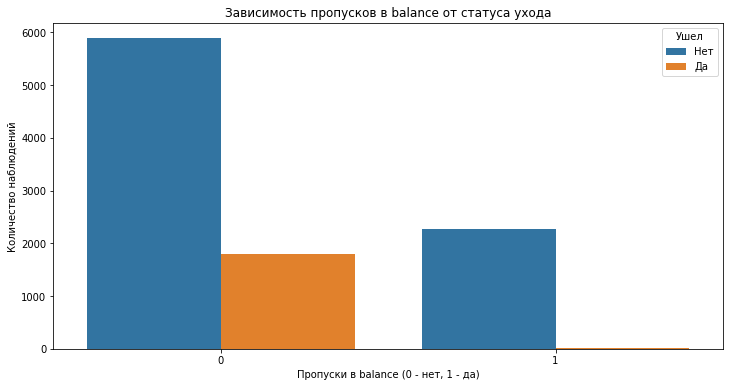

In [171]:
plt.figure(figsize=(12, 6))
sns.countplot(data=proect, x='balance_missing', hue='churn')
plt.title('Зависимость пропусков в balance от статуса ухода')
plt.xlabel('Пропуски в balance (0 - нет, 1 - да)')
plt.ylabel('Количество наблюдений')
plt.legend(title='Ушел', loc='upper right', labels=['Нет', 'Да'])
plt.show()

Визуально проиллюстрировал, что наличие пропуска в балансе, не зависело от ухода

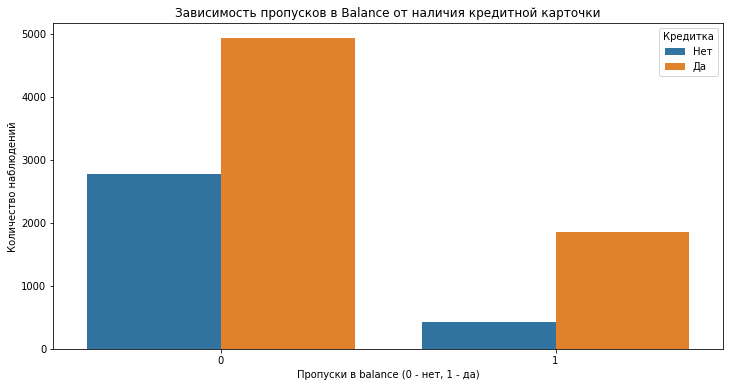

In [172]:
plt.figure(figsize=(12, 6))
sns.countplot(data=proect, x='balance_missing', hue='credit_card')
plt.title('Зависимость пропусков в Balance от наличия кредитной карточки')
plt.xlabel('Пропуски в balance (0 - нет, 1 - да)')
plt.ylabel('Количество наблюдений')
plt.legend(title='Кредитка', loc='upper right', labels=['Нет', 'Да'])
plt.show()

еще раз подтвердается факт,что на пропуск так или иначе влияет наличие кредитки

По итогу анализа. удалось найти некую зависимость пропусков к наличию кредитки, так же есть зависимость и по заявленному имуществу,у большинства пропусков - 0, т.е. общая картина следующая:

у 1858 клиентов, у кого пропущены значения в balance имеют кредитку , так же у 2164 в графе собственности 0 значение, т.е. у этих клиентов есть кредитка и у них пропущенное значение в балансе и отсутствие заявленной собственности, просто эти клиенты не хотят предоставлять информацию банку и пользуются только одной картой, т.к. у 1934 только один продукт- и это кредитка


**Вывод** могу предположить,что данные пропуски относятся к типу MNAR (Missing Not At Random / Отсутствует не случайно) а значит, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Тип пропуска определен корректно

In [173]:
proect.duplicated().sum()

0

In [174]:
print (proect['user_id'].duplicated().sum())

50


нашли 50 дубликатов по user_id, начинаем работать по этому направлению

In [175]:
# дубликаты
duplicates = proect[proect['user_id'].duplicated(keep=False)]

# Дополнительно, можно вывести уникальные user_id с дубликатами и их количество
duplicate_counts = duplicates['user_id'].value_counts()
display(duplicate_counts)

162053    2
208738    2
170312    2
160075    2
208081    2
227795    2
183510    2
140377    2
148826    2
131419    2
155872    2
217826    2
210662    2
199312    2
171751    2
210792    2
141265    2
217412    2
172142    2
175730    2
197364    2
149365    2
126368    2
200863    2
123461    2
164676    2
210627    2
120258    2
150667    2
163207    2
220816    2
217619    2
185748    2
181526    2
155765    2
188957    2
152479    2
191520    2
124450    2
168998    2
217643    2
195884    2
190253    2
208815    2
226719    2
117943    2
211130    2
116540    2
143592    2
129785    2
Name: user_id, dtype: int64

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


В единственной или последней строке ячейки кода Юпитера, метод print() не обязателен, в отличии от тренажера

In [176]:
proect[proect['user_id'] == 162053]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
5629,162053,921.0,Рыбинск,М,33.0,3,857011.13,2,1,1,113512.57,1,0
8733,162053,786.0,Ярославль,М,29.0,4,205824.97,3,1,0,121371.73,0,0


In [177]:
proect[proect['user_id'] == 208738]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
1580,208738,897.0,Рыбинск,Ж,45.0,5,859018.19,2,1,1,145510.08,1,0
5840,208738,839.0,Ярославль,М,60.0,5,1102438.37,2,0,1,116500.81,0,0


In [178]:
proect[proect['user_id'] == 170312]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
790,170312,901.0,Ярославль,М,33.0,4,3276783.93,3,0,1,358700.96,1,0
3039,170312,813.0,Рыбинск,Ж,47.0,3,370027.67,2,0,0,129835.56,0,0


выборочно взял три айди, есть закономерность:
дубликаты вызваны тем,что первый клиент ушел из банка, и его айди "освободилась" и далее новому клиенту выдается тот же айди, принимаю решение удалить тех клиентов.которые остались , выборка не велика 25 строк, но ушедшие клиенты нужны нам для дальнейшего анализа, можно было бы сгенерировать им новые айди, но потеря данных не существенна

In [179]:
proect = proect[~(proect['user_id'].duplicated(keep=False) & (proect['churn'] == 0))]
print (proect['user_id'].duplicated().sum())

0


In [180]:
proect[proect['user_id'] == 162053]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
5629,162053,921.0,Рыбинск,М,33.0,3,857011.13,2,1,1,113512.57,1,0


проверяю,остались ли "нужные" нам для исследования клиенты

### Кодирование для использования в анализе корреляций.

In [181]:
# Применяем one-hot кодирование к колонке 'gender'
gender_dummies = pd.get_dummies(proect['gender'], prefix='gender')

# Применяем one-hot кодирование к колонке 'city'
city_dummies = pd.get_dummies(proect['city'], prefix='city')

# Объединяем оригинальный датафрейм с созданными dummies
proect = pd.concat([proect, gender_dummies, city_dummies], axis=1)


# Выводим измененный датафрейм
display(proect.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1


In [182]:
proect.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1


кодировка прошла успешно, все необходимые данные переведены в необходимый формат для дальнейшей работы

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Кодирование проведено успешно

**Вывод по данной главе**:

 1) Привели имена колонок к общему формату
 
 2) Избавились от дубликатов и пропущенных значений там, где это было возможно
 
 3) Провели кодировку в gender и city 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

На этом этапе всё хорошо. Ты корректно выгрузил данные и посмотрел их содержимое. Выполнил первичную проверку на пропуски и дубликаты. Можно приступать к следующему шагу
</div>

## EDA (Exploratory Data Analysis):

### Анализ распределения признаков, включая оттоки, с исследованием значений для непрерывных и категориальных переменных.

т.к. клиентов банка не может быть с 0 продуктов,а такой клиент 1, удалю его

In [183]:
proect = proect[proect['products'] != 0]

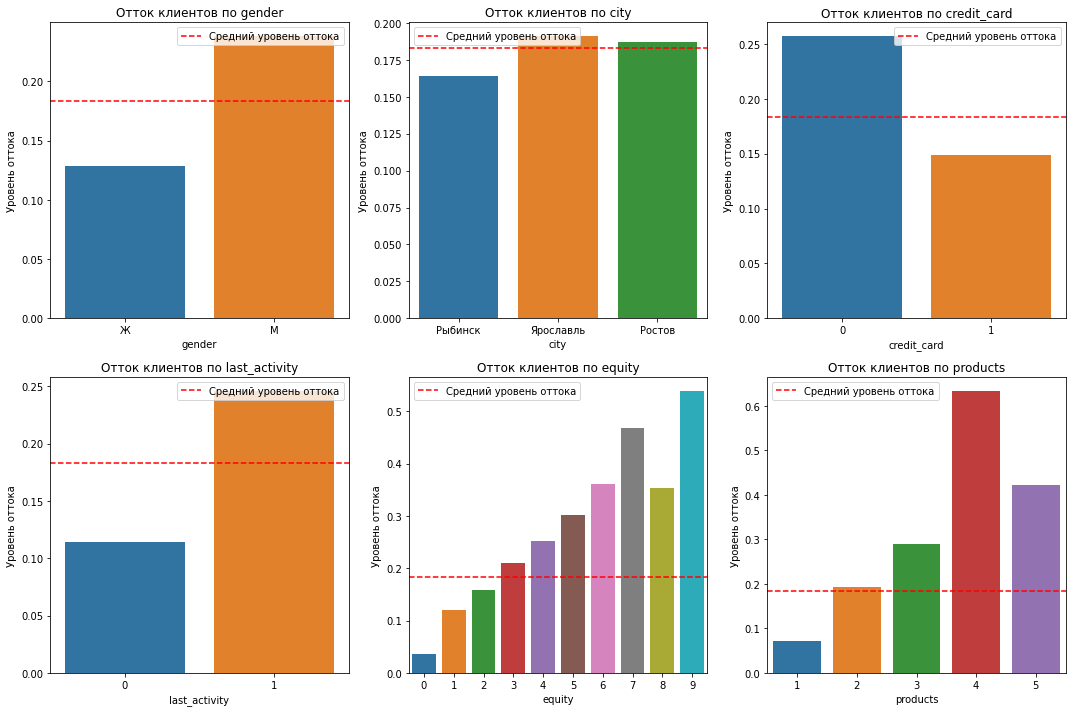

In [184]:
# Функция для создания барплота по заданной категории
def create_churn_plot(ax, category):
    # Вычисляем средний уровень оттока
    average_churn_rate = proect['churn'].mean()

    # Создаем барплот для оттока по одной из категорий на заданной оси
    sns.barplot(x=category, y='churn', data=proect, estimator=lambda x: sum(x) / len(x), ci=None, ax=ax)

    # Добавляем линию среднего уровня оттока
    ax.axhline(average_churn_rate, color='red', linestyle='--', label='Средний уровень оттока')

    # Настройки элементов графика
    ax.set_title(f'Отток клиентов по {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Уровень оттока')
    ax.legend()

# Список категорий для графиков
categories = ['gender', 'city', 'credit_card', 'last_activity', 'equity', 'products']

# Определяем количество строк и столбцов для подграфиков
n_cols = 3
n_rows = (len(categories) + n_cols - 1) // n_cols  # вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Генерация графиков для всех заданных категорий
for i, cat in enumerate(categories):
    ax = axes[i // n_cols, i % n_cols]  # получаем ось для текущего графика
    create_churn_plot(ax, cat)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Дискретные продукты через  барплот и акслайн со средним уровнем оттока. (в декомпозиции подробно описывал этот момент)

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Разобрался, поменял, выводы дополнил на основе графиков </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Ноль продуктов - аномалия, предлагаю подумать, все ли значения адекватны

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Пересмотрел еще раз встречу, там была подсказка, что с 0 продуктов клиентов не может быть, такой был 1, удалил) </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Верно, нельзя быть клиентом банка, не имея его продуктов

Из графиков видим следующее:

 - мужчины чаще подвержены оттоку
 
 - больший отток мы наблюдаем в Ярославле и Ростове,относительно среднебанковского
 
 - клиенты,начиная от  двух продуктов становятся наиболее подвержены оттоку,пик "риска" приходит на клиентов с 4 продуктами
 - клиенты с кредиткой чаще уходят из банка
 
 - активные клиенты уходят чаще "спящих"
 
 - клиенты, начиная с 3 баллов собственности начинают чаще уходить, пик видим на 9 продуктак

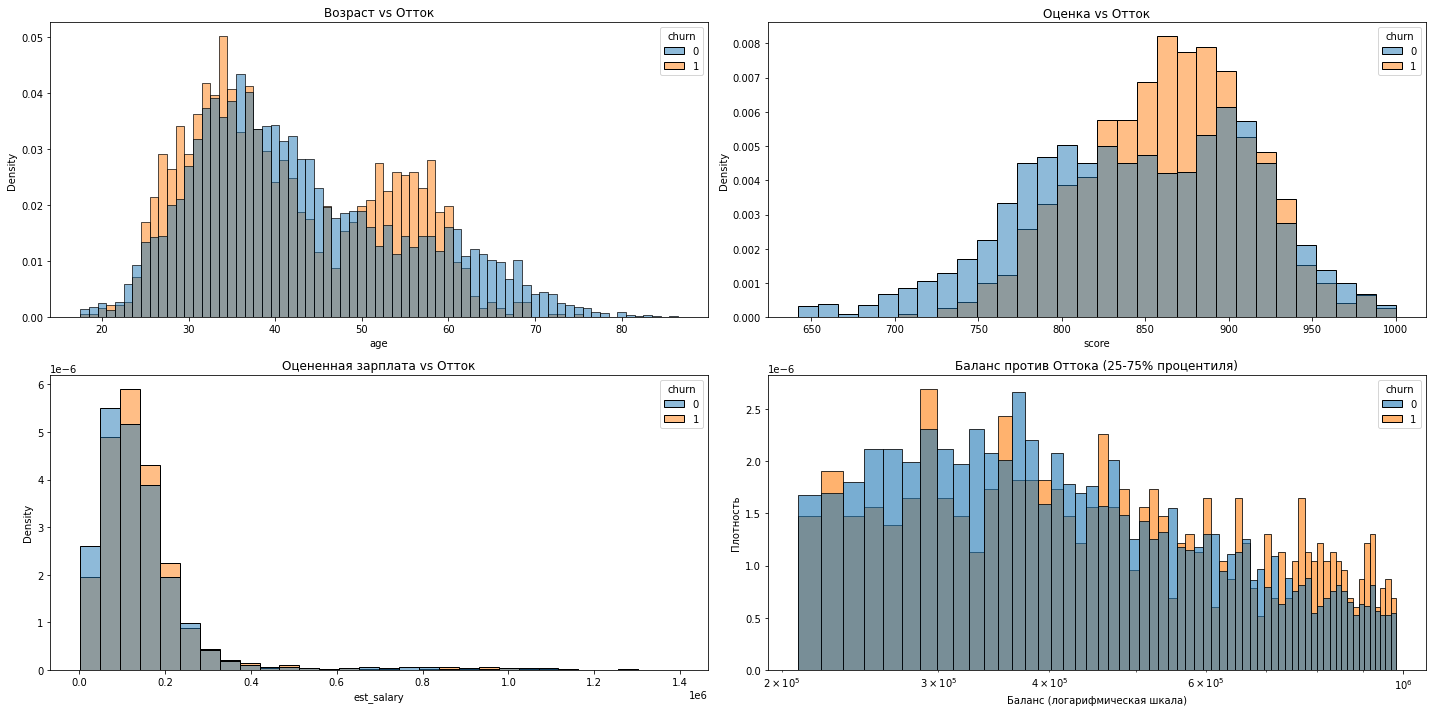

In [185]:
# Задаем параметры графиков
plt.figure(figsize=(20, 10))

# График 1: Возраст vs Отток
plt.subplot(2, 2, 1)
sns.histplot(data=proect, x='age', hue='churn', stat='density', common_norm=False, 
             alpha=0.5, bins=30, discrete=True)
plt.title('Возраст vs Отток')

# График 2: Оценка vs Отток
plt.subplot(2, 2, 2)
sns.histplot(data=proect, x='score', hue='churn', stat='density', common_norm=False, alpha=0.5, bins=30)
plt.title('Оценка vs Отток')

# График 3: Оцененная зарплата vs Отток
plt.subplot(2, 2, 3)
sns.histplot(data=proect, x='est_salary', hue='churn', stat='density', common_norm=False, alpha=0.5, bins=30)
plt.title('Оцененная зарплата vs Отток')

# Находим 25-й и 75-й процентиль
lower_bound = proect['balance'].quantile(0.15)
upper_bound = proect['balance'].quantile(0.75)

# Фильтруем данные на основе процентилей
filtered_data = proect[(proect['balance'] >= lower_bound) & (proect['balance'] <= upper_bound)]

# График 4: Баланс vs Отток
plt.subplot(2, 2, 4)
sns.histplot(data=filtered_data, x='balance', hue='churn', stat='density', common_norm=False, 
             alpha=0.6, bins=60)  # Увеличиваем количество бинов для лучшего отображения

plt.title('Баланс против Оттока (25-75% процентиля)')
plt.xlabel('Баланс (логарифмическая шкала)')
plt.ylabel('Плотность')
plt.xscale('log')  # Применяем логарифмическую шкалу к оси X



# Показываем график
plt.tight_layout()  # Оптимизация размещения субграфиков
plt.show()

In [186]:
proect['balance'].describe()

count    7.664000e+03
mean     8.282063e+05
std      1.984122e+06
min      0.000000e+00
25%      2.955266e+05
50%      5.249277e+05
75%      9.807537e+05
max      1.191136e+08
Name: balance, dtype: float64

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут несколько моментов, на которые стоит обратить внимание:    
    
1. Некорректны корзины возраста (они нецелочисленные и на графике возникают провалы)

2. Отсутствует график по балансу. Добавь, пожалуйста
    

    

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Корзины возраста настроил с помощью discrete=True. График по балансу добавил,но если честно, возникли трудности, я не понимаю как загуглить корректно проблему построения графика с большим разбросом, придумал "костыль" отобрав 25-75 процентили,словил какой-то брейн лаг либо забыл как это делать </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
Отличная реализация. Молодец

Из графиков выше следует:

- самый подверженый к уходу возраст 26-28 лет, далее 56-58

- клиенты чаще уходят при диапозоне от 830 до 900 баллов скоринга 

- с ростом заработной платы клиенты больше подвержены оттоку

In [187]:
# Фильтрация данных по интересующим нас городам
cities_of_interest = ['Ростов', 'Рыбинск', 'Ярославль']
filtered_df = proect[proect['city'].isin(cities_of_interest)]

# Группировка данных по городу и подсчет количества всех клиентов и ушедших
grouped_data = filtered_df.groupby('city').agg(
    total_clients=('churn', 'size'),           # Общее количество клиентов
    churned_clients=('churn', 'sum')           # Количество ушедших клиентов
)

# Вычисление уровня оттока
grouped_data['churn_rate'] = grouped_data['churned_clients'] / grouped_data['total_clients'] * 100

# Печать результатов
display("Уровень оттока по городам (в процентах):")
display(grouped_data[['total_clients', 'churned_clients', 'churn_rate']])

'Уровень оттока по городам (в процентах):'

,total_clients,churned_clients,churn_rate
city,,,
Ростов,1416,265,18.714689
Рыбинск,2653,436,16.434225
Ярославль,5854,1117,19.080970


как уже замечалось ранее - клиенты из Ярославля уходят чаще остальных

In [188]:
# Группировка данных по полу и подсчет количества всех клиентов и ушедших
grouped_gender_data = proect.groupby('gender').agg(
    total_clients=('churn', 'size'),           # Общее количество клиентов
    churned_clients=('churn', 'sum')           # Количество ушедших клиентов
)

# Вычисление уровня оттока
grouped_gender_data['churn_rate'] = grouped_gender_data['churned_clients'] / grouped_gender_data['total_clients'] * 100

# Печать результатов
display("Уровень оттока по полу (в процентах):")
display(grouped_gender_data[['total_clients', 'churned_clients', 'churn_rate']])

'Уровень оттока по полу (в процентах):'

,total_clients,churned_clients,churn_rate
gender,,,
Ж,4952,635,12.823102
М,4971,1183,23.798029


еще раз подтвердили наблюдение, что мужчины подвержены уходу больше

In [189]:
# Фильтрация данных по сегментам
churned = proect[proect['churn'] == 1]
not_churned = proect[proect['churn'] == 0]

# Расчет необходимых статистик
result = {
    "Признак": [],
    "Отток": [],
    "Не отток": [],
    "Относительная разница": []
}

# Средние значения
result["Признак"].append("Средняя зарплата")
result["Отток"].append(churned['est_salary'].mean())
result["Не отток"].append(not_churned['est_salary'].mean())
result["Относительная разница"].append((result["Не отток"][-1] - result["Отток"][-1]) / result["Отток"][-1] * 100)

result["Признак"].append("Средний возраст")
result["Отток"].append(churned['age'].mean())
result["Не отток"].append(not_churned['age'].mean())
result["Относительная разница"].append((result["Не отток"][-1] - result["Отток"][-1]) / result["Отток"][-1] * 100)

# Медианные значения
result["Признак"].append("Медианное количество продуктов")
result["Отток"].append(churned['products'].median())
result["Не отток"].append(not_churned['products'].median())
result["Относительная разница"].append((result["Не отток"][-1] - result["Отток"][-1]) / result["Отток"][-1] * 100)

result["Признак"].append("Медианное количество собственности")
result["Отток"].append(churned['equity'].median())
result["Не отток"].append(not_churned['equity'].median())
result["Относительная разница"].append((result["Не отток"][-1] - result["Отток"][-1]) / result["Отток"][-1] * 100)

# Моды по категориальным переменным
result["Признак"].append("Мода по городу")
result["Отток"].append(churned['city'].mode().iloc[0])
result["Не отток"].append(not_churned['city'].mode().iloc[0])
result["Относительная разница"].append(None) 

result["Признак"].append("Мода по полу")
result["Отток"].append(churned['gender'].mode().iloc[0])
result["Не отток"].append(not_churned['gender'].mode().iloc[0])
result["Относительная разница"].append(None)


# Преобразование результата в DataFrame
result_df = pd.DataFrame(result)

# Вывод результата
display(result_df)

,Признак,Отток,Не отток,Относительная разница
0,Средняя зарплата,148357.483157,147788.268353,-0.383678
1,Средний возраст,41.429593,43.015793,3.828664
2,Медианное количество продуктов,2.0,2.0,0.000000
3,Медианное количество собственности,4.0,3.0,-25.000000
4,Мода по городу,Ярославль,Ярославль,NaN
5,Мода по полу,М,Ж,NaN


Средняя запрлата у ушедших клиентов выше, при этом, средний возраст ниже, есть существенная разница по кол-ву собственности,и в очередной раз видим , что чаще уходят мужчины

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

А откуда взято это задание? 

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Не совсем понял вопрос. Сделал задание исходя из рекомендации при проверке декомпозиции. Если вопрос как я его сделал, то я не заимствовал этот код, а сделал с помощью гпт чата</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
Понял) Спасибо, что подсветил) Но лучше самому)
    

### Корреляционный анализ.

In [190]:
proect.corr()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
user_id,1.000000,0.009227,0.016599,0.004665,0.005661,-0.004306,0.003694,-0.031866,-0.001113,-0.010495,0.003975,-0.029941,0.029941,-0.032635,0.013422,0.011130
score,0.009227,1.000000,-0.012065,0.065541,0.235192,-0.003484,-0.095677,-0.030495,0.164665,0.106055,0.137600,-0.010727,0.010727,-0.037924,-0.000648,0.027552
age,0.016599,-0.012065,1.000000,0.019679,0.070081,0.017537,-0.122684,-0.008415,-0.039112,-0.050415,-0.027471,0.212132,-0.212132,0.047468,0.027971,-0.058925
equity,0.004665,0.065541,0.019679,1.000000,0.163678,0.431361,-0.167597,-0.001378,-0.171406,0.270137,-0.708761,0.020877,-0.020877,0.034727,-0.003369,-0.021663
balance,0.005661,0.235192,0.070081,0.163678,1.000000,0.075796,-0.059835,0.024745,0.338843,0.085708,NaN,-0.051447,0.051447,-0.035858,-0.034084,0.056836
products,-0.004306,-0.003484,0.017537,0.431361,0.075796,1.000000,-0.252298,0.038374,-0.117372,0.301946,-0.485992,0.022059,-0.022059,-0.007081,-0.043626,0.044292
credit_card,0.003694,-0.095677,-0.122684,-0.167597,-0.059835,-0.252298,1.000000,-0.033787,0.036121,-0.130297,0.158070,-0.125971,0.125971,-0.098169,-0.050833,0.115553
last_activity,-0.031866,-0.030495,-0.008415,-0.001378,0.024745,0.038374,-0.033787,1.000000,0.002171,0.169729,0.028184,0.013306,-0.013306,0.006820,0.049848,-0.049705
est_salary,-0.001113,0.164665,-0.039112,-0.171406,0.338843,-0.117372,0.036121,0.002171,1.000000,0.001580,0.307381,-0.081191,0.081191,-0.106493,-0.055320,0.125509
churn,-0.010495,0.106055,-0.050415,0.270137,0.085708,0.301946,-0.130297,0.169729,0.001580,1.000000,-0.249674,-0.141854,0.141854,0.004151,-0.029465,0.023562


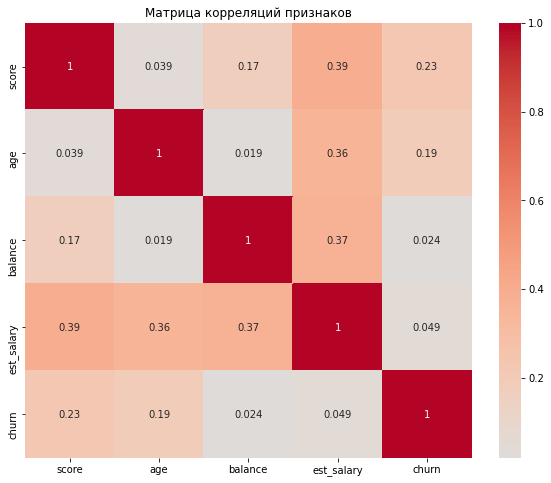

In [191]:
# Укажите непрерывные признаки для анализа
interval_cols = ['score', 'age', 'balance', 'est_salary']

# Вычисление матрицы корреляций с использованием phik
corr_matrix = phik_matrix(proect[interval_cols + ['churn']], interval_cols=interval_cols)

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Признаки equity и last_activity являются дискретными и их не нужно передавать в параметр interval_cols

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> Упс, исправил, выводы отредактировал</div>

относительно непрерывных признаков,видим, что самая большая зависимость у оттока с оценкой и возрастом

In [192]:
# Определяем переменные
X = proect[['age', 'equity', 'products', 'gender_Ж', 'gender_М', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']]
y = proect['churn']

# Добавляем константу для модели
X = sm.add_constant(X)

# Создаем модель
model = sm.OLS(y, X).fit()

# Получаем результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     266.5
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          3.28e-317
Time:                        10:47:00   Log-Likelihood:                -3914.2
No. Observations:                9923   AIC:                             7842.
Df Residuals:                    9916   BIC:                             7893.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0444      0.009     -5.

**age (возраст):**

Коэффициент: -0.0008. Это говорит о том, что с увеличением возраста на 1 год вероятность ухода клиента уменьшается на 0.0008 (статистически значимо с p-значением 0.005).

**equity (капитал):**

Коэффициент: 0.0341. Каждое увеличение капитала на единицу увеличивает вероятность ухода клиента на 0.0341 (статистически значимо с p-значением 0.000).

**products (количество продуктов):**

Коэффициент: 0.1120. Увеличение количества продуктов на 1 увеличивает вероятность ухода на 0.1120 (статистически значимо с p-значением 0.000).

**gender:**

Коэффициент: -0.0782. Женщины имеют меньшую вероятность ухода на 0.0782 по сравнению с мужчинами (значимо с p-значением 0.000).
gender_М (мужской пол):

Коэффициент: 0.0338. Мужчины имеют вероятность ухода больше на 0.0338 по сравнению с  категорией (женщины) (значимо с p-значением 0.000).


**city_Ростов:**

Коэффициент: -0.0106. Вероятность ухода клиентов из Ростова ниже на 0.0106 (ненастатистически значимо с p-значением 0.180).

**city_Рыбинск:**

Коэффициент: -0.0241 (значимо с p-значением 0.000), показывающий, что клиенты из Рыбинска имеют меньшую вероятность ухода.

**city_Ярославль:**

Коэффициент: -0.0096 (погранично значимо с p-значением 0.076).

**Краткий вывод по 3 шагу**:

**мужчины чаще подвержены оттоку**

клиенты с двумя продуктами наиболее подвержены оттоку, клиенты с 1 продуктом покидают банк реже всего

клиенты с кредиткой чаще уходят из банка

активные клиенты уходят чаще "спящих"

**клиенты, у которых указано 5 баллов собственности чаще всего уходят из банка**



на основе полученных выводов проведем проверку гипотез

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Не опираешься на шкалу Чеддока, не определил границу между наличием влияния и отсутствием признаков такого влияния (обычно по 10% берём в данном проекте).

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> По поводу шкалы Чеддока, если честно, вообще не понимаю как ее применить тут, поискал примеры, но чаще пишут про Эванса, что-то запутался.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Например 0-0.2 - корреляция отсутствует, 0.2-0.4 очень слабая и т.д.

##  Проверка статистических гипотез

Руководствуясь рекомендациями тимлида, логика моих действий в данной главе следующая:

Шаги анализа:

**Тест Шапиро-Уилка:**
Мы проводим тест Шапиро-Уилка для обеих групп, чтобы проверить, нормально ли распределены данные в каждой из них.
Нулевая гипотеза теста: данные имеют нормальное распределение.
Если значение p-value (доверительный уровень) больше 0.05, это означает, что мы не можем отклонить нулевую гипотезу и считаем, что данные распределены нормально.

**Проверка нормальности:**
Если обе группы имеют нормальное распределение (p-value > 0.05), мы переходим к следующему тесту.

**Тест Левене:**
Проводим тест Левене, чтобы проверить равенство дисперсий между группами.
Нулевая гипотеза: дисперсии равны.
Если p-value теста Левене также больше 0.05, значит мы можем считать дисперсии равными.

**t-тест:**
Если данные нормально распределены и дисперсии равны, проводим t-тест для независимых выборок.
Нулевая гипотеза: средние значения equity для двух групп равны.
Если p-value t-теста меньше 0.05, это свидетельствует о значительных различиях между средними.

**Тест Манна-Уитни:**
Если хотя бы одна из групп не имеет нормального распределения, мы используем непараметрический тест Манна-Уитни, который не требует выполнения предпосылок нормальности или равенства дисперсий.
Нулевая гипотеза: распределения equity для двух групп равны.
Аналогично, если p-value меньше 0.05, мы отклоняем нулевую гипотезу.

### **Гипотеза о наличии собственности у ушедших и оставшихся клиентов**

H₀:  кол-во баллов собственности оставшихся и ушедших клиентов равны

H₁:  кол-во баллов собственности оставшихся и ушедших клиентов не равны


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

In [193]:
# Проверка нормальности распределения с помощью теста Шапиро-Уилка
normality_test_0 = st.shapiro(proect[proect['churn'] == 0]['equity'])
normality_test_1 = st.shapiro(proect[proect['churn'] == 1]['equity'])

print(f"p-value для нормальности (оставшиеся клиенты): {normality_test_0.pvalue}")
print(f"p-value для нормальности (отточенные клиенты): {normality_test_1.pvalue}")

# Предположение о нормальности: p-value > 0.05
normality_0 = normality_test_0.pvalue > 0.05
normality_1 = normality_test_1.pvalue > 0.05

if normality_0 and normality_1:
    # Проверяем равенство дисперсий с помощью теста Левене
    levene_test = st.levene(proect[proect['churn'] == 0]['equity'],
                             proect[proect['churn'] == 1]['equity'])
    
    print(f"p-value для теста Левене: {levene_test.pvalue}")

    # Предположение о равенстве дисперсий: p-value > 0.05
    equal_var = levene_test.pvalue > 0.05
    
    # Выполняем t-тест
    results = st.ttest_ind(proect[proect['churn'] == 0]['equity'],
                            proect[proect['churn'] == 1]['equity'],
                            equal_var=equal_var)
    
    print(f"p-value для t-теста: {results.pvalue}")
    alpha = 0.05  # Уровень значимости
    if results.pvalue < alpha:
        print("Мы отклоняем нулевую гипотезу о равенстве средних.")
    else:
        print("У нас недостаточно доказательств для отклонения нулевой гипотезы.")
else:
    # Если данные не нормально распределены, используем тест Манна-Уитни
    mannwhitney_results = st.mannwhitneyu(proect[proect['churn'] == 0]['equity'],
                                           proect[proect['churn'] == 1]['equity'],
                                           alternative='two-sided')
    
    print(f"p-value для теста Манна-Уитни: {mannwhitney_results.pvalue}")
    alpha = 0.05  # Уровень значимости
    if mannwhitney_results.pvalue < alpha:
        print("Мы отклоняем нулевую гипотезу о равенстве распределений.")
    else:
        print("У нас недостаточно доказательств для отклонения нулевой гипотезы.")

p-value для нормальности (оставшиеся клиенты): 0.0
p-value для нормальности (отточенные клиенты): 5.356880853081415e-30
p-value для теста Манна-Уитни: 1.4291024270306944e-156
Мы отклоняем нулевую гипотезу о равенстве распределений.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Т.к. нулевая гипотеза отклонена, мы можем утверждать,что кол-во собственности ушедших и оставшихся клиентов не одинаково

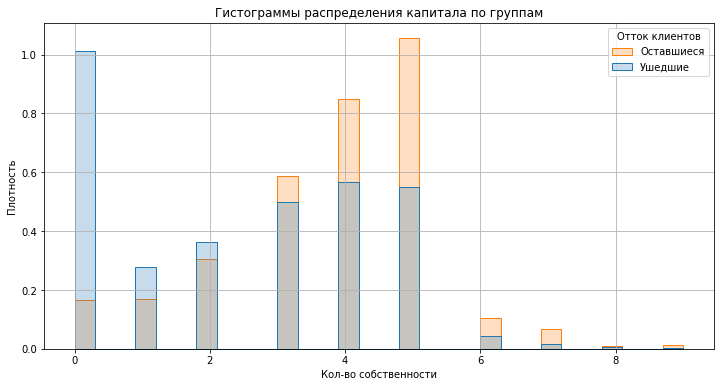

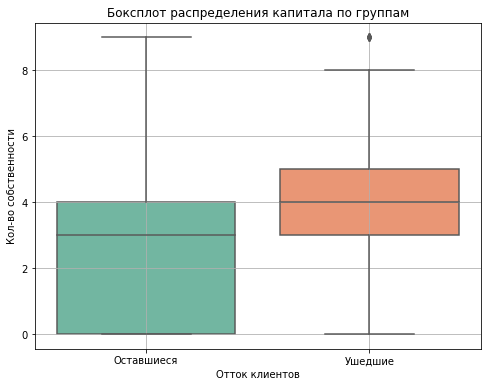

In [194]:
# Визуализация: Гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(data=proect, x='equity', hue='churn', element='step', stat='density', common_norm=False, bins=30)
plt.title('Гистограммы распределения капитала по группам')
plt.xlabel('Кол-во собственности')
plt.ylabel('Плотность')
plt.legend(title='Отток клиентов', labels=['Оставшиеся', 'Ушедшие'])
plt.grid()
plt.show()

# Визуализация: Боксплот
plt.figure(figsize=(8, 6))
sns.boxplot(data=proect, x='churn', y='equity', palette='Set2')
plt.title('Боксплот распределения капитала по группам')
plt.ylabel('Кол-во собственности')
plt.xlabel('Отток клиентов')
plt.xticks([0, 1], ['Оставшиеся', 'Ушедшие'])
plt.grid()
plt.show()

Так же для наглядности привел иллюстрацию еще раз,где мы видим распределение ушедших и оставшихся клиентов по собственности

### **Гипотеза о кол-ве банковских  продуктов у ушедших и осташихся клиентов**

H₀: кол-во банковских продуктов у  оставшихся и ушедших клиентов равны

H₁: кол-во банковских продуктов у  оставшихся и ушедших клиентов не равны

In [195]:
# Проверка нормальности распределения с помощью теста Шапиро-Уилка
normality_test_0 = st.shapiro(proect[proect['churn'] == 0]['products'])
normality_test_1 = st.shapiro(proect[proect['churn'] == 1]['products'])

print(f"p-value для нормальности (оставшиеся клиенты): {normality_test_0.pvalue}")
print(f"p-value для нормальности (отточенные клиенты): {normality_test_1.pvalue}")

# Предположение о нормальности: p-value > 0.05
normality_0 = normality_test_0.pvalue > 0.05
normality_1 = normality_test_1.pvalue > 0.05

if normality_0 and normality_1:
    # Проверяем равенство дисперсий с помощью теста Левене
    levene_test = st.levene(proect[proect['churn'] == 0]['products'],
                             proect[proect['churn'] == 1]['products'])
    
    print(f"p-value для теста Левене: {levene_test.pvalue}")

    # Предположение о равенстве дисперсий: p-value > 0.05
    equal_var = levene_test.pvalue > 0.05
    
    # Выполняем t-тест
    results = st.ttest_ind(proect[proect['churn'] == 0]['products'],
                            proect[proect['churn'] == 1]['products'],
                            equal_var=equal_var)
    
    print(f"p-value для t-теста: {results.pvalue}")
    alpha = 0.05  # Уровень значимости
    if results.pvalue < alpha:
        print("Мы отклоняем нулевую гипотезу о равенстве средних.")
    else:
        print("У нас недостаточно доказательств для отклонения нулевой гипотезы.")
else:
    # Если данные не нормально распределены, используем тест Манна-Уитни
    mannwhitney_results = st.mannwhitneyu(proect[proect['churn'] == 0]['products'],
                                           proect[proect['churn'] == 1]['products'],
                                           alternative='two-sided')
    
    print(f"p-value для теста Манна-Уитни: {mannwhitney_results.pvalue}")
    alpha = 0.05  # Уровень значимости
    if mannwhitney_results.pvalue < alpha:
        print("Мы отклоняем нулевую гипотезу о равенстве распределений.")
    else:
        print("У нас недостаточно доказательств для отклонения нулевой гипотезы.")

p-value для нормальности (оставшиеся клиенты): 0.0
p-value для нормальности (отточенные клиенты): 2.4491334040083423e-40
p-value для теста Манна-Уитни: 7.674130300677304e-162
Мы отклоняем нулевую гипотезу о равенстве распределений.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


нулевая гипотеза отклонена,а значит, кол-во банковских продуктов между двух исследуемых групп не равно

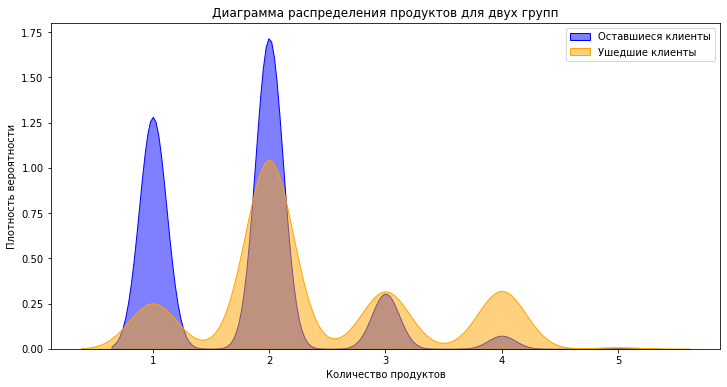

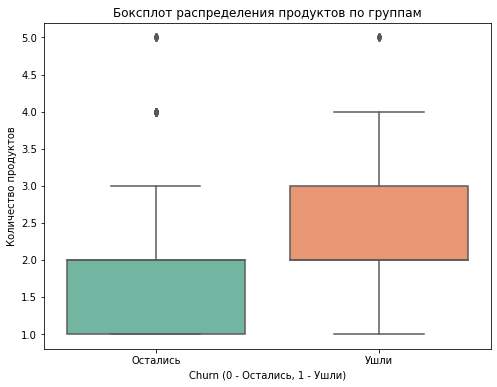

In [196]:

# Диаграмма распределения
plt.figure(figsize=(12, 6))

# Создаем диаграмму распределения для оставшихся клиентов
sns.kdeplot(proect[proect['churn'] == 0]['products'], 
             label='Оставшиеся клиенты', 
             fill=True, 
             color='blue', 
             alpha=0.5)

# Создаем диаграмму распределения для отточенных клиентов
sns.kdeplot(proect[proect['churn'] == 1]['products'], 
             label='Ушедшие клиенты', 
             fill=True, 
             color='orange', 
             alpha=0.5)

plt.title('Диаграмма распределения продуктов для двух групп')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Бокс-плот
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='products', data=proect, palette='Set2')
plt.title('Боксплот распределения продуктов по группам')
plt.xlabel('Churn (0 - Остались, 1 - Ушли)')
plt.ylabel('Количество продуктов')
plt.xticks([0, 1], ['Остались', 'Ушли'])
plt.show()

Еще раз вернемся к иллюстрации кол-во продуктов у клиентов двух групп

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

## Подведение промежуточных итогов: выводы по результатам EDA, корреляционного анализа и гипотез.

На основе проведенных анализов и проверки гипотез:

Следует обратить внимание на отток клиентов , с точки зрения их кол-ва продуктов, кол-ва очков собственности и пола, как мы увидели в 3 главе исследования, есть несколько категорий с повышенным риском ухода:

1) мужчины

2) клиенты из ярославля

3) клиенты, чьи баллы собственности более 3 ( чем выше баллы,тем больше риск ухода)

4) клиенты, которые пользуются 3-4 продуктами банков


На основе гипотез и анализа следующим шагом мы создаим сегментацию ушедших клиентов, для дальнейшей проработки


## Сегментация: анализ узких сегментов (менее 500 клиентов и их отток).

In [197]:
# Общее количество клиентов
total_clients = proect.shape[0]

# Количество клиентов, которые ушли
churned_clients = proect[proect['churn'] == 1].shape[0]

# Рассчитываем средний уровень оттока
average_churn_rate = (churned_clients / total_clients) * 100 if total_clients > 0 else 0

print(f"Средний уровень оттока: {average_churn_rate:.2f}%")

Средний уровень оттока: 18.32%


In [198]:
def analyze_churn_segments(df, features):
    """
    Анализ сегментов оттока клиентов.

    Параметры:
    df: DataFrame с данными клиентов.
    features: список признаков для группировки.

    Возвращает:
    DataFrame с сводными данными о количестве клиентов, количестве ушедших и уровне оттока.
    """
    if 'churn' not in df.columns:
        raise ValueError("DataFrame must contain a 'churn' column.")

    # Группировка по заданным признакам
    grouped = df.groupby(features)

    # Подсчёт клиентов
    churn_summary = grouped.agg(
        total_clients=('churn', 'count'),
        churned_clients=('churn', 'sum'),
        churn_rate=('churn', 'mean')  # Средний уровень оттока
    ).reset_index()

    return churn_summary

<div class="alert alert-info"> <b>Комментарии студента:</b> мало опыта, что бы сделать "чистую" функцию, что я хотел:
    что бы функция сама смоделировала несколько сегментов и по заданным критериям (не менее 500 человек и уровень оттока выше 18%) дала разные варианты, искал в инете, но так и не понял как это сделать.</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

В данном проекте, если честно, то не представляю, как можно реализовать функцией. Единственный вариант - это машинное обучение и с помощью ML совершать кластеризацию. Предлагаю выбрать вручную

<div class="alert alert-info"> <b>Комментарии студента №1 :</b> В итоге, по сути и выбирал в ручную, применяя требования по 500 человек минимум и наличии оттока выше среднебанковского, исправь , пожалуйста,если я не прав </div>

In [199]:
# Применяем функцию к DataFrame
features_to_analyze = ['city', 'gender', 'credit_card']
result = analyze_churn_segments(proect, features_to_analyze)

# Выводим результат
print(result)

         city gender  credit_card  total_clients  churned_clients  churn_rate
0      Ростов      Ж            0            360               56    0.155556
1      Ростов      Ж            1            373               34    0.091153
2      Ростов      М            0            252               77    0.305556
3      Ростов      М            1            431               98    0.227378
4     Рыбинск      Ж            0            541               88    0.162662
5     Рыбинск      Ж            1            809               50    0.061805
6     Рыбинск      М            0            412              125    0.303398
7     Рыбинск      М            1            891              173    0.194164
8   Ярославль      Ж            0            975              214    0.219487
9   Ярославль      Ж            1           1894              193    0.101901
10  Ярославль      М            0            635              255    0.401575
11  Ярославль      М            1           2350              45

In [200]:
# Применяем функцию к DataFrame
features_to_analyze = ['products', 'credit_card']
result = analyze_churn_segments(proect, features_to_analyze)

# Выводим результат
print(result)

   products  credit_card  total_clients  churned_clients  churn_rate
0         1            0            450               23    0.051111
1         1            1           2856              212    0.074230
2         2            0           1907              527    0.276350
3         2            1           3188              451    0.141468
4         3            0            667              201    0.301349
5         3            1            362               96    0.265193
6         4            0            151               64    0.423841
7         4            1            323              236    0.730650
8         5            1             19                8    0.421053


In [201]:
# Применяем функцию к DataFrame
features_to_analyze = ['equity', 'gender']
result = analyze_churn_segments(proect, features_to_analyze)

# Выводим результат
print(result)

    equity gender  total_clients  churned_clients  churn_rate
0        0      Ж           1177               39    0.033135
1        0      М           1377               51    0.037037
2        1      Ж            394               29    0.073604
3        1      М            377               64    0.169761
4        2      Ж            549               65    0.118397
5        2      М            497              101    0.203219
6        3      Ж            819              117    0.142857
7        3      М            712              204    0.286517
8        4      Ж            953              165    0.173137
9        4      М            888              299    0.336712
10       5      Ж            940              187    0.198936
11       5      М            970              389    0.401031
12       6      Ж             70               17    0.242857
13       6      М             91               41    0.450549
14       7      Ж             36               12    0.333333
15      

На основе проведенных наблюдений,мы можем выделить три фокус группы:

**1) Мужчины из Ярославля без кредитных карт - всего 635 клиентов, с оттоком 40% , 255 из них ушли**

**2) Клиенты с 3 продуктами, без кредитных карт, таких клиентов 667, с оттоком в 30%, 201 клиент из данной группы покинул банк**

**3) Мужчины с 5 баллами собственности ,всего их 886,отток составил 40%, 359 из них ушли**

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Отличная сегментация и с логикой приоритизации согласен

## Приоритизация сегментов

**Сегмент 1: Мужчины из Ярославля без кредитных карт**
Потенциал дохода (3)
Текущая вовлеченность (2)
Легкость охвата (4)
Общие риски (3)
Общий балл: 3 + 2 + 4 + 3 = 12


**Сегмент 2: Клиенты с 3 продуктами, без кредитных карт**
Потенциал дохода (4)
Текущая вовлеченность (5)
Легкость охвата (3)
Общие риски (2)
Общий балл: 4 + 5 + 3 + 2 = 14


**Сегмент 3: Мужчины с 5 баллами собственности**
Потенциал дохода (5)
Текущая вовлеченность (3)
Легкость охвата (2)
Общие риски (1)
Общий балл: 5 + 3 + 2 + 1 = 11
Итоговая приоритизация сегментов
На основании вышеупомянутых баллов можно определить порядок приоритета:

Клиенты с 3 продуктами, без кредитных карт: **14 баллов**

Мужчины из Ярославля без кредитных карт: **12 баллов**

Мужчины с 5 баллами собственности: **11 баллов**



## Формирование рекомендаций для работы с сегментами

На основе исследования рекомендуется:

1) в приоритете обратить внимание на мужчин из ярославля без кредитных карт, вероятно, данные клиенты пользуются продуктами сторонних банков, как минимум кредитных, высокая вероятность их ухода из банка, является ковенант в другом банке при взятии кредитной карты (вероятно. с большим балансом) в следствии чего, предлагаю обзвонить данную группу людей с целью привлечения на кредитное обслуживание

2) Так же обратить внимание на кредитную линию, клиентам, которые пользуются 3 продуктами банка, так же в обязательном порядке произвести качество чек колл, т.е. узнать лояльность клиента , доволен ли он обслуживанием и нынешними продуктами, высока вероятность, что есть проблемы с теми 3 продуктами, которые есть у клиентов

3) Вынести на обсуждение создание вип обслуживания в банке, 886 клиентов (мужчины с 5 баллами собственности) зачастую, относятся к сегменту премиум клиентов , необходимо для удержания серьезно проработать вип подход к данной группе, что является 8.86% от всей нашей клиентской базы, при этом, данные клиенты имеют повышенной потенциал дохода для банка

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Поправь, пожалуйста, выводы после корректировки

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b>



Итог ревью - ты проделал хорошую работу! Многие расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Оформление кода

2) Анализ распределения признаков

3) Корреляция

3) Сегментация

4) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
    
ЗЫ. Презентацию присылай в пачке в ЛС    
    

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на SQL!
</div>